<a href="https://colab.research.google.com/github/fr3d3rico/data-science-cifar-10-playground/blob/main/cifar_10_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <span style="color:blue">Instalando tensorflow</apn>

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


### <span style="color:blue">Imports</apn>

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

import tensorflow.compat.v1 as tf # carrega o tensorflow v1
tf.disable_v2_behavior()

from tensorflow.keras.utils import plot_model

from tensorflow import keras
from tensorflow.keras.models import Sequential

from keras.callbacks import EarlyStopping
from keras.layers import Dense, Flatten, Conv2D,Conv2DTranspose

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D

2024-03-06 00:03:28.252715: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-06 00:03:28.402882: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 00:03:28.402972: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 00:03:28.430157: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-06 00:03:28.501536: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-06 00:03:28.503087: I tensorflow/core/platform/cpu_feature_guard.cc:1

Instructions for updating:
non-resource variables are not supported in the long term


### <span style="color:blue">Carregando o dataset</apn>

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

### <span style="color:blue">Visualizando o formato dos dados</apn>

In [ ]:
print('Dataset de treino:')
print(X_train.shape)
print(Y_train.shape)

print('\nDataset de teste:')
print(X_test.shape)
print(Y_test.shape)

Dataset de treino:
(50000, 32, 32, 3)
(50000, 1)

Dataset de teste:
(10000, 32, 32, 3)
(10000, 1)


### <span style="color:blue">Nome das classes e visualizando algumas imagens do dataset</apn>

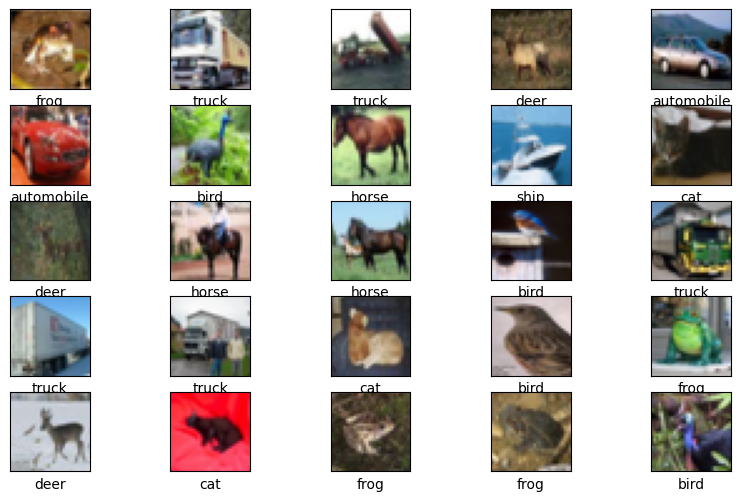

In [ ]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()



### <span style="color:blue"> Visualizando uma imagem aleatória do dataset de treino (X_train) </apn>

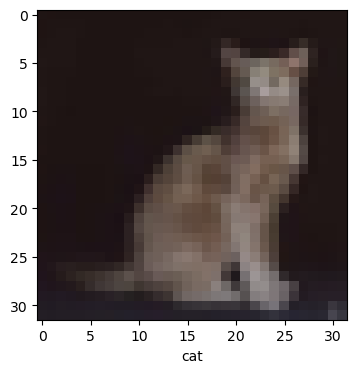

In [ ]:

image_index = np.random.randint(X_train.shape[0], size=1)

plt.figure(figsize=(4,6))
plt.imshow(X_train[image_index[0]])
plt.xlabel(class_names[Y_train[image_index[0]][0]])
plt.show()


### <span style="color:blue"> Construção do modelo CNN </apn>

Aqui tentei colocar os 3 primeiros igual da aula do professor.
Com base também na aula tentei mesclar alguns a mais no objeto Sequential.

In [ ]:

model = Sequential()

width = X_train.shape[1] #largura das amostras
height = X_train.shape[2] #altura das amostras

model.add(Conv2D(filters=32, #camada convolucional de 32 filtros
                     input_shape=(32,32,3),
                      kernel_size=(3, 3), #com kernel 3x3
                      strides=(2, 2), # e stride 2
                      activation=tf.nn.relu, #usando ativação relu
                      padding='same'))

model.add(Conv2D(filters=64, # entrega para camada convolucional de 64
                     input_shape=(32,32,3),
                      kernel_size=(3, 3), #com mesmos parâmetros
                      activation=tf.nn.relu,
                      padding='same'))

model.add(Conv2D(filters=128, #e em seguida de 128
                     input_shape=(32,32,3),
                      kernel_size=(3, 3),
                      activation=tf.nn.relu,
                      padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Flatten())  # Flatten a saída 3D para 1D

model.add(Dense(10, activation='softmax'))  # Camada densa de saída com 10 unidades e softmax

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### <span style="color:blue"> Convertendo um vetor de inteiros em classes </apn>

Aqui fiz o tratamento para evitar o erro:

In [ ]:

from keras.utils import to_categorical

Y_train_categorical = to_categorical(Y_train, num_classes=10)
Y_test_categorical = to_categorical(Y_test, num_classes=10)


### <span style="color:blue"> Fazendo o treinamento do modelo </apn>

Aqui utilizo a classe EarlyStopping como callback para parar o treinamento quando a métrica do treino parar de melhorar.
Ref: https://keras.io/api/callbacks/early_stopping/

Nas execuções que fiz o treino parou entre as epochs 10 e 15 e o máximo de 25. Quando a métrica de loss que estava caindo, começa a crescer novamente, então o treino é paralizado pelo callback EarlyStopping.

In [ ]:

#val_loss or loss?
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train,
                    Y_train_categorical,
                    epochs=25,
                    verbose=1,
                    validation_data=(X_test, Y_test_categorical),
                    callbacks=[early_stopping])


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
   32/50000 [..............................] - ETA: 2:31 - loss: 27.6067 - acc: 0.0625

2024-03-06 00:03:33.759900: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-03-06 00:03:33.789363: W tensorflow/c/c_api.cc:305] Operation '{name:'training/Adam/dense/kernel/m/Assign' id:344 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense/kernel/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense/kernel/m, training/Adam/dense/kernel/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


49984/50000 [============================>.] - ETA: 0s - loss: 1.7123 - acc: 0.4652

/opt/conda/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2024-03-06 00:04:02.698865: W tensorflow/c/c_api.cc:305] Operation '{name:'loss/mul' id:183 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


50000/50000 [==============================] - 30s 605us/sample - loss: 1.7121 - acc: 0.4652 - val_loss: 1.2424 - val_acc: 0.5546
Epoch 2/25
50000/50000 [==============================] - 31s 617us/sample - loss: 1.2097 - acc: 0.5749 - val_loss: 1.1855 - val_acc: 0.5876
Epoch 3/25
50000/50000 [==============================] - 32s 638us/sample - loss: 1.1137 - acc: 0.6131 - val_loss: 1.0815 - val_acc: 0.6258
Epoch 4/25
50000/50000 [==============================] - 32s 637us/sample - loss: 1.0565 - acc: 0.6315 - val_loss: 1.0795 - val_acc: 0.6266
Epoch 5/25
50000/50000 [==============================] - 32s 632us/sample - loss: 1.0002 - acc: 0.6546 - val_loss: 1.1349 - val_acc: 0.6127
Epoch 6/25
50000/50000 [==============================] - 32s 641us/sample - loss: 0.9614 - acc: 0.6665 - val_loss: 1.0614 - val_acc: 0.6338
Epoch 7/25
50000/50000 [==============================] - 34s 680us/sample - loss: 0.9337 - acc: 0.6754 - val_loss: 1.0698 - val_acc: 0.6359
Epoch 8/25
50000/50000 [

### <span style="color:blue"> Avaliação do modelo </apn>

In [ ]:

evaluation = model.evaluate(X_test, Y_test_categorical)
print('{}'.format(evaluation[1]))


0.6220999956130981


### <span style="color:blue"> Instalação para utilizar o pacote visualizarkeras </apn>

Estava lendo a documentação e este pacote não tem sido muito atualizado.
Ele permite utilizar para mostrar um gráfico das camadas modelo.
Encontrei como alterar as cores.
As legendas não estão funcionando... porém no Google colab funciona.

In [ ]:
pip install visualkeras Pillow

Note: you may need to restart the kernel to use updated packages.


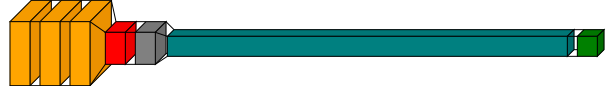

In [ ]:

from collections import defaultdict
import visualkeras

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[Dropout]['fill'] = 'gray'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

#visualkeras.layered_view(model, color_map=color_map, legend=True)
visualkeras.layered_view(model, color_map=color_map)


# <span style="color:blue"> Fazendo a previsão de 10 imagens aleatórias </apn>

Imagem[7228] prevista como [cat] e o correto é [cat]


/opt/conda/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2024-03-06 00:12:04.525911: W tensorflow/c/c_api.cc:305] Operation '{name:'dense/Softmax' id:107 op device:{requested: '', assigned: ''} def:{{{node dense/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/tmp/ipykernel_30334/1363523840.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'Image

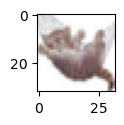

Imagem[1153] prevista como [ship] e o correto é [ship]


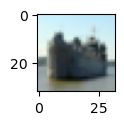

Imagem[2153] prevista como [ship] e o correto é [ship]


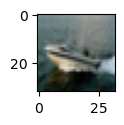

Imagem[3858] prevista como [ship] e o correto é [ship]


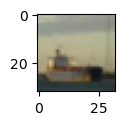

Imagem[3818] prevista como [truck] e o correto é [truck]


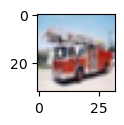

Imagem[6727] prevista como [horse] e o correto é [frog]


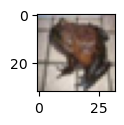

Imagem[2567] prevista como [dog] e o correto é [deer]


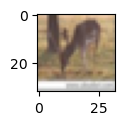

Imagem[4032] prevista como [cat] e o correto é [cat]


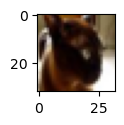

Imagem[1575] prevista como [bird] e o correto é [bird]


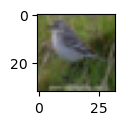

Imagem[5776] prevista como [frog] e o correto é [dog]


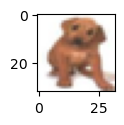

In [ ]:

for x in np.random.randint(10000, size=10):
    image = X_test[x]
    plt.figure(figsize=(1,3))
    prediction = np.argmax(model.predict(image.reshape(1, 32, 32, 3)))

    print(f'Imagem[{x}] prevista como [{class_names[prediction]}] e o correto é [{class_names[int(Y_test[x])]}]')

    plt.imshow(image)
    plt.show()


### <span style="color:blue"> Matrix da confusão e relatório </apn>

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html


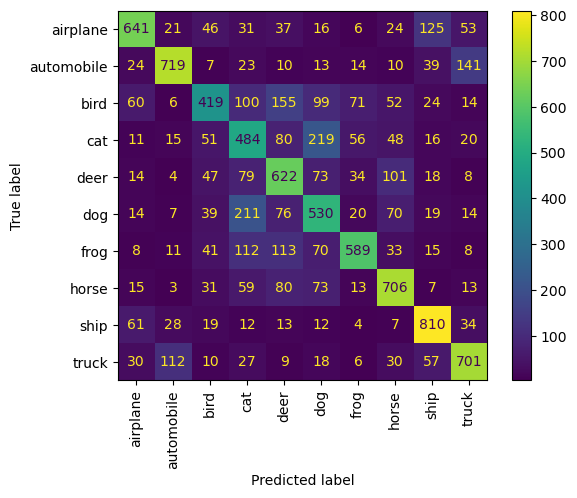

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

preds = model.predict(X_test)
predictions = np.argmax(preds, axis=1)
cm = confusion_matrix(y_true=Y_test, y_pred=predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.xticks(rotation=90) # fazendo a rotação dos labels do eixo x
plt.show()


In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68      1000
           1       0.78      0.72      0.75      1000
           2       0.59      0.42      0.49      1000
           3       0.43      0.48      0.45      1000
           4       0.52      0.62      0.57      1000
           5       0.47      0.53      0.50      1000
           6       0.72      0.59      0.65      1000
           7       0.65      0.71      0.68      1000
           8       0.72      0.81      0.76      1000
           9       0.70      0.70      0.70      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000



In [ ]:
history.params

{'batch_size': 32,
 'epochs': 25,
 'steps': None,
 'samples': 50000,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

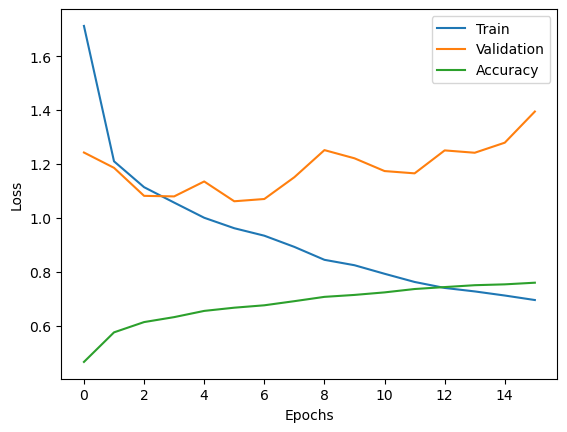

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Accuracy'])
plt.show()


### <span style="color:blue"> Valores das Previsões </apn>

A variável possui um array de array. Cada array interno possui 10 valores. Cada um desses valores foi a probabilidade em que cada uma das classes receberam.


In [ ]:
preds

array([[2.5067953e-04, 2.3615461e-04, 3.8315156e-05, ..., 3.4354196e-04,
        5.4000993e-04, 6.0688661e-05],
       [2.7561176e-08, 1.4849837e-01, 4.8754377e-08, ..., 5.5397674e-12,
        8.5149300e-01, 8.5963375e-06],
       [2.8226295e-01, 1.0901609e-02, 6.1246715e-03, ..., 6.4479881e-03,
        6.6647863e-01, 1.8054821e-02],
       ...,
       [2.1243802e-09, 7.7638222e-11, 8.2927886e-03, ..., 3.3285073e-04,
        2.7405099e-08, 2.3671211e-07],
       [5.7937190e-02, 3.5303599e-01, 1.9211739e-02, ..., 4.5976292e-05,
        3.1513680e-04, 1.6482787e-02],
       [8.1573506e-07, 2.4337921e-09, 5.7454407e-04, ..., 9.5043701e-01,
        2.1204180e-07, 7.0779791e-08]], dtype=float32)

In [ ]:
len(preds)

10000

### <span style="color:blue"> Visualizando a imagem e a sua respectiva probabilidade </apn>

Aqui faço a impressão aleatória de 10 previsões. Cada uma das previsões com a sua respectiva imagem, e as probabilidades.

O texto diz por exemplo:

Imagem[6599] prevista como [deer] e o correto é [bird]

Então no lado esquerdo terá a imagem real[bird] e no lado direito as probabilidades mostrando que ele previu(certo/errado) um [deer]


/tmp/ipykernel_30334/1067352017.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fig.suptitle(f'Imagem[{idx}] prevista como [{class_names[predictions[idx]]}] e o correto é [{class_names[int(Y_test[idx])]}]')


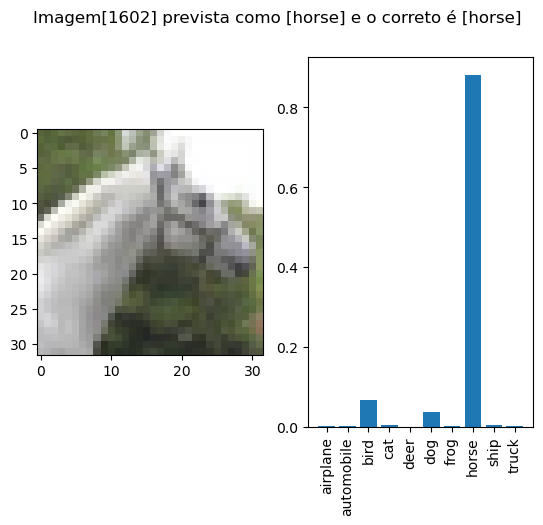

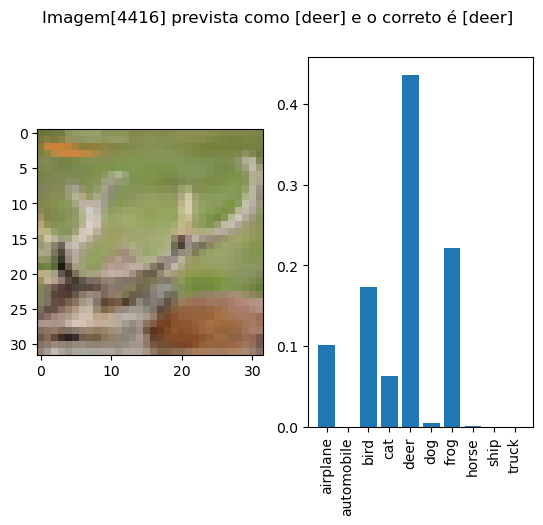

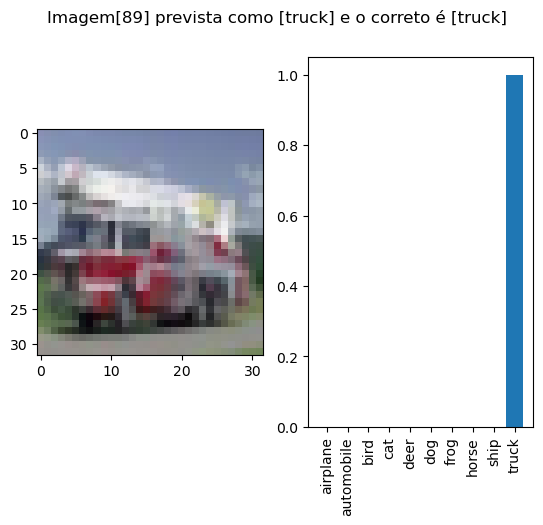

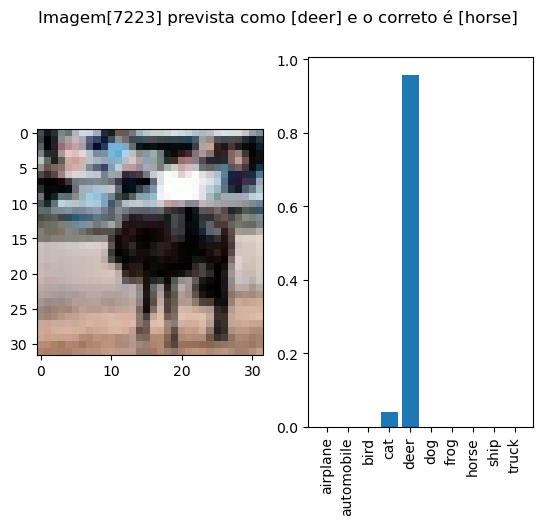

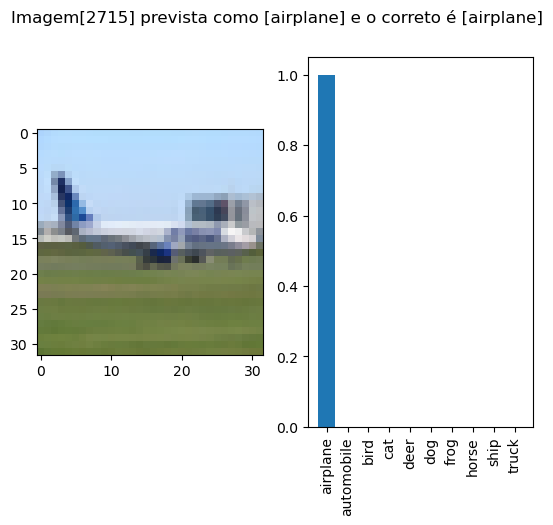

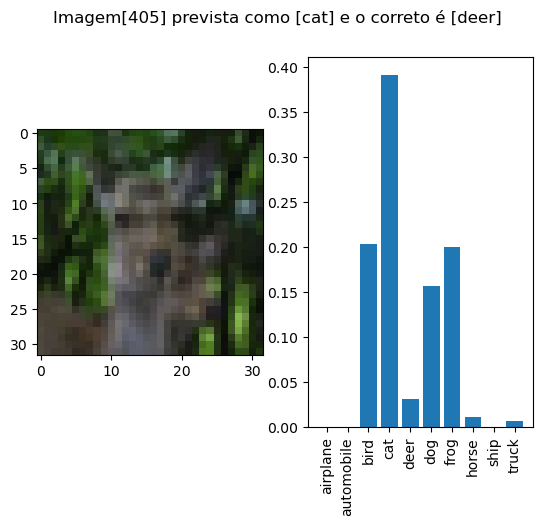

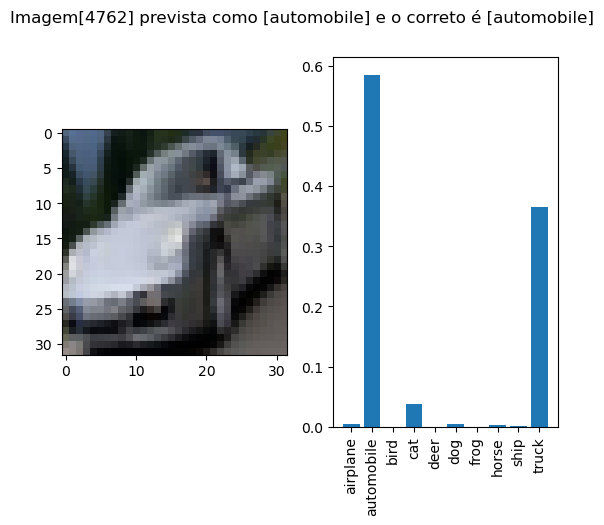

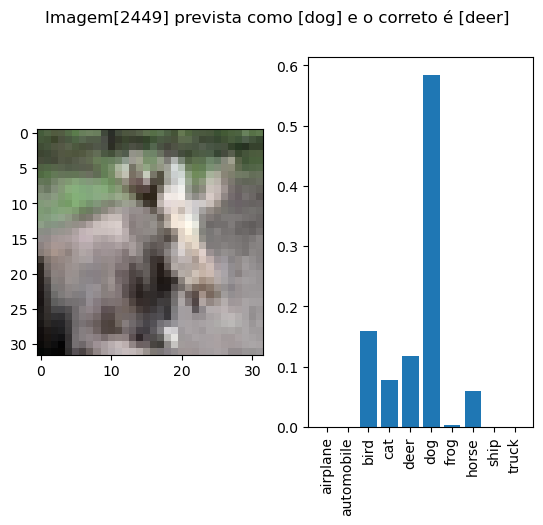

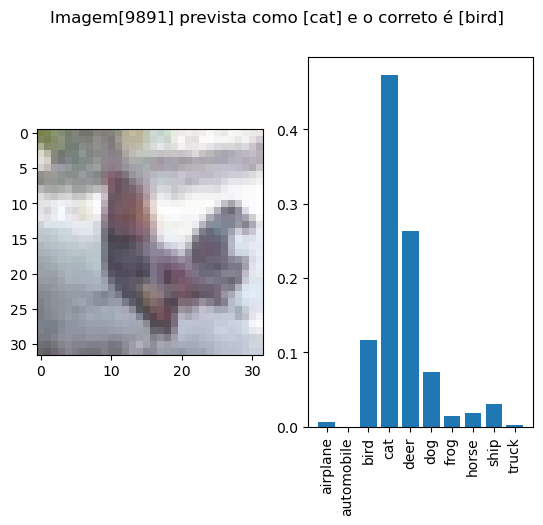

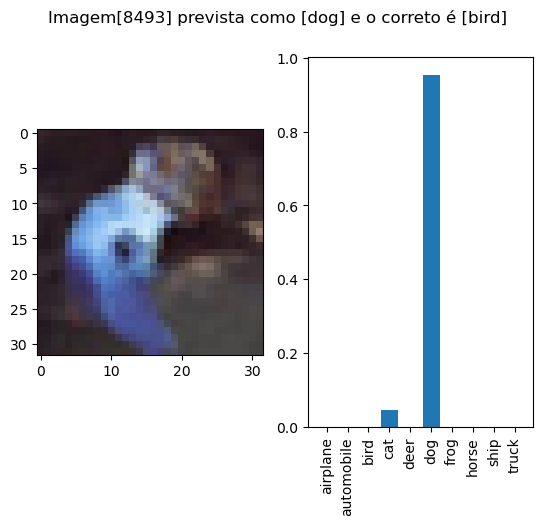

In [ ]:

for idx in np.random.randint(10000, size=10):

    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle(f'Imagem[{idx}] prevista como [{class_names[predictions[idx]]}] e o correto é [{class_names[int(Y_test[idx])]}]')

    ax1.imshow(X_test[idx])
    ax2.set_xticks(range(10))

    ax2.bar(class_names, preds[idx])

    plt.xticks(rotation=90)
    plt.show()